In [1]:
from autotst.molecule import *
from autotst.reaction import *
from autotst.database import *
from autotst.geometry import *

# To view ase atoms
from ase.visualize import view
#import py3Dmol


thermo.py:839 loadLibraries INFO Loading thermodynamics library from primaryThermoLibrary.py in /home/harms.n/Code/RMG-master/../RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /home/harms.n/Code/RMG-master/../RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from CBS_QB3_1dHR.py in /home/harms.n/Code/RMG-master/../RMG-database/input/thermo/libraries...
thermo.py:856 loadGroups INFO Loading thermodynamics group database from /home/harms.n/Code/RMG-master/../RMG-database/input/thermo/groups...
transport.py:294 loadGroups INFO Loading transport group database from /home/harms.n/Code/RMG-master/../RMG-database/input/transport/groups...
database.py:167 loadFamilies INFO Loading the user-specified kinetics families from /home/harms.n/Code/RMG-master/../RMG-database/input/kinetics/families
statmech.py:526 loadGroups INFO Loading frequencies group data

# Just a quick way to observe molecules

In [2]:
mol = AutoTST_Molecule("CCCC")
mol

<autotst.molecule.AutoTST_Molecule instance at 0x2af06379b560>

In [3]:
mol.rmg_molecule.atoms[0].coords

array([ 1.9045, -0.0614,  0.063 ])

In [4]:
view(mol.ase_molecule, viewer='x3d')

# In order to do this, you need to have pip installed py3dmol
mol.view_mol()

## So, now we're going to demonstrate how this works on a step by step process

In [5]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdchem import Mol
from rdkit.Chem.rdMolTransforms import *
import ase
from ase import Atom, Atoms
import rmgpy
from rmgpy.molecule import Molecule
#import py3Dmol
import numpy as np

In [6]:
smiles = "CCCC"
rmg_mol = Molecule(SMILES=smiles)
rmg_mol

In [7]:
def view_mol(mol):
    """
    A method designed to create a 3D figure of the AutoTST_Molecule with py3Dmol from the rdkit_molecule
    """
    mb  = Chem.MolToMolBlock(mol)
    p = py3Dmol.view(width=400, height=400)
    p.addModel(mb, "sdf")
    p.setStyle({'stick':{}})
    p.setBackgroundColor('0xeeeeee')
    p.zoomTo()
    return p.show()

In [8]:
rdkit_mol = rmg_mol.toRDKitMol(removeHs=False)
rdkit.Chem.AllChem.EmbedMolecule(rdkit_mol)
#view_mol(rdkit_mol)

0

In [9]:
mol_list = AllChem.MolToMolBlock(rdkit_mol).split('\n')
ase_atoms = []
for i, line in enumerate(mol_list):

    if i > 3:
        try:
            atom0, atom1, bond, rest = line
            atom0 = int(atom0)
            atom0 = int(atom1)
            bond = float(bond)

        except ValueError:
            try:
                x, y, z, symbol = line.split()[0:4]
                x = float(x)
                y = float(y)
                z = float(z)
                #print symbol

                ase_atoms.append(Atom(symbol=symbol, position=(x,y,z)))
            except:
                continue

ase_mol = Atoms(ase_atoms)
view(ase_mol, viewer='x3d')

### So, in it's simplicity, an `AutoTST_Molecule` is an object that houses all of the above information (with additional geometric features)

# Now for reactions

Reactions have to be `RMG_Reactions` or in the form `r1+r2_p1+p2`. Currently this is only set up for H_Abstractions, but others should be able to work later

In [10]:
Molecule(SMILES="C")

In [11]:
mol = AutoTST_Molecule("CCC")
mol.ase_molecule

Atoms(symbols='C3H8', pbc=False)

In [12]:
rxn = AutoTST_Reaction("CCCCC+[O]O_[CH2]CCCC+OO", "H_Abstraction")
rxn

reaction.py:423 bm_pre_edit INFO Changing lower limit 2.520343 to 2.457475
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 10 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 11 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 12 of 10000
reaction.py:482 rd_embed INFO RDKi

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 110 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 111 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 112 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 113 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 114 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 115 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 116 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 117 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 118 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 119 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 120 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 121 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 122 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 218 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 219 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 220 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 221 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 222 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 223 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 224 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 225 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 226 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 227 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 228 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 229 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 230 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 326 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 327 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 328 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 329 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 330 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 331 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 332 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 333 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 334 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 335 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 336 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 337 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 338 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 434 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 435 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 436 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 437 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 438 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 439 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 440 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 441 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 442 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 443 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 444 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 445 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 446 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 542 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 543 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 544 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 545 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 546 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 547 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 548 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 549 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 550 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 551 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 552 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 553 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 554 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 650 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 651 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 652 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 653 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 654 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 655 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 656 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 657 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 658 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 659 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 660 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 661 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 662 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 758 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 759 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 760 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 761 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 762 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 763 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 764 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 765 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 766 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 767 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 768 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 769 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 770 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 866 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 867 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 868 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 869 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 870 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 871 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 872 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 873 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 874 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 875 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 876 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 877 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 878 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 974 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 975 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 976 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 977 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 978 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 979 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 980 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 981 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 982 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 983 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 984 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 985 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 986 of 10000
reaction.py:

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1081 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1082 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1083 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1084 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1085 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1086 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1087 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1088 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1089 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1090 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1091 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1092 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1093 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1188 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1189 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1190 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1191 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1192 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1193 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1194 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1195 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1196 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1197 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1198 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1199 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1200 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1295 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1296 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1297 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1298 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1299 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1300 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1301 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1302 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1303 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1304 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1305 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1306 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1307 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1402 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1403 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1404 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1405 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1406 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1407 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1408 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1409 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1410 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1411 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1412 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1413 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1414 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1509 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1510 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1511 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1512 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1513 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1514 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1515 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1516 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1517 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1518 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1519 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1520 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1521 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1616 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1617 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1618 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1619 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1620 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1621 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1622 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1623 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1624 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1625 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1626 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1627 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1628 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1723 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1724 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1725 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1726 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1727 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1728 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1729 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1730 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1731 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1732 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1733 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1734 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1735 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1830 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1831 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1832 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1833 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1834 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1835 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1836 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1837 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1838 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1839 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1840 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1841 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1842 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1937 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1938 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1939 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1940 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1941 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1942 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1943 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1944 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1945 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1946 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1947 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1948 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 1949 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2044 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2045 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2046 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2047 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2048 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2049 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2050 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2051 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2052 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2053 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2054 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2055 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2056 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2151 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2152 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2153 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2154 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2155 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2156 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2157 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2158 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2159 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2160 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2161 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2162 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2163 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2258 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2259 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2260 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2261 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2262 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2263 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2264 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2265 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2266 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2267 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2268 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2269 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2270 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2365 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2366 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2367 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2368 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2369 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2370 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2371 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2372 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2373 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2374 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2375 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2376 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2377 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2472 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2473 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2474 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2475 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2476 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2477 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2478 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2479 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2480 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2481 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2482 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2483 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2484 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2579 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2580 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2581 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2582 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2583 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2584 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2585 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2586 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2587 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2588 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2589 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2590 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2591 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2686 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2687 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2688 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2689 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2690 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2691 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2692 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2693 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2694 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2695 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2696 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2697 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2698 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2793 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2794 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2795 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2796 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2797 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2798 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2799 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2800 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2801 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2802 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2803 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2804 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2805 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2900 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2901 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2902 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2903 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2904 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2905 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2906 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2907 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2908 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2909 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2910 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2911 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 2912 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3007 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3008 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3009 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3010 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3011 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3012 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3013 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3014 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3015 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3016 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3017 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3018 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3019 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3114 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3115 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3116 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3117 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3118 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3119 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3120 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3121 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3122 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3123 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3124 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3125 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3126 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3221 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3222 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3223 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3224 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3225 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3226 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3227 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3228 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3229 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3230 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3231 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3232 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3233 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3328 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3329 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3330 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3331 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3332 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3333 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3334 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3335 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3336 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3337 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3338 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3339 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3340 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3435 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3436 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3437 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3438 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3439 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3440 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3441 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3442 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3443 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3444 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3445 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3446 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3447 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3542 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3543 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3544 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3545 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3546 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3547 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3548 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3549 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3550 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3551 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3552 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3553 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3554 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3649 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3650 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3651 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3652 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3653 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3654 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3655 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3656 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3657 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3658 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3659 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3660 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3661 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3756 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3757 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3758 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3759 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3760 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3761 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3762 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3763 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3764 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3765 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3766 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3767 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3768 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3863 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3864 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3865 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3866 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3867 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3868 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3869 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3870 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3871 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3872 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3873 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3874 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3875 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3970 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3971 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3972 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3973 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3974 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3975 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3976 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3977 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3978 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3979 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3980 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3981 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 3982 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4077 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4078 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4079 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4080 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4081 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4082 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4083 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4084 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4085 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4086 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4087 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4088 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4089 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4184 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4185 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4186 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4187 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4188 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4189 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4190 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4191 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4192 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4193 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4194 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4195 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4196 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4291 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4292 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4293 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4294 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4295 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4296 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4297 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4298 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4299 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4300 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4301 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4302 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4303 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4398 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4399 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4400 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4401 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4402 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4403 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4404 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4405 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4406 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4407 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4408 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4409 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4410 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4505 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4506 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4507 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4508 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4509 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4510 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4511 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4512 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4513 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4514 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4515 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4516 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4517 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4612 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4613 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4614 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4615 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4616 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4617 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4618 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4619 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4620 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4621 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4622 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4623 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4624 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4719 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4720 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4721 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4722 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4723 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4724 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4725 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4726 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4727 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4728 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4729 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4730 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4731 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4826 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4827 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4828 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4829 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4830 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4831 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4832 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4833 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4834 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4835 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4836 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4837 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4838 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4933 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4934 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4935 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4936 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4937 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4938 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4939 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4940 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4941 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4942 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4943 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4944 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 4945 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5040 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5041 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5042 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5043 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5044 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5045 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5046 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5047 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5048 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5049 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5050 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5051 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5052 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5147 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5148 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5149 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5150 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5151 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5152 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5153 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5154 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5155 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5156 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5157 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5158 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5159 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5254 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5255 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5256 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5257 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5258 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5259 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5260 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5261 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5262 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5263 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5264 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5265 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5266 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5361 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5362 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5363 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5364 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5365 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5366 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5367 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5368 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5369 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5370 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5371 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5372 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5373 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5468 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5469 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5470 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5471 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5472 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5473 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5474 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5475 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5476 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5477 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5478 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5479 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5480 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5575 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5576 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5577 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5578 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5579 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5580 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5581 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5582 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5583 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5584 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5585 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5586 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5587 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5682 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5683 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5684 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5685 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5686 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5687 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5688 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5689 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5690 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5691 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5692 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5693 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5694 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5789 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5790 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5791 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5792 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5793 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5794 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5795 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5796 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5797 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5798 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5799 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5800 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5801 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5896 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5897 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5898 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5899 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5900 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5901 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5902 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5903 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5904 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5905 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5906 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5907 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 5908 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6003 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6004 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6005 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6006 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6007 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6008 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6009 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6010 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6011 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6012 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6013 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6014 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6015 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6110 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6111 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6112 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6113 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6114 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6115 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6116 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6117 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6118 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6119 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6120 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6121 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6122 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6217 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6218 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6219 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6220 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6221 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6222 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6223 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6224 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6225 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6226 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6227 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6228 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6229 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6324 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6325 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6326 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6327 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6328 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6329 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6330 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6331 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6332 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6333 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6334 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6335 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6336 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6431 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6432 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6433 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6434 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6435 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6436 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6437 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6438 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6439 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6440 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6441 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6442 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6443 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6538 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6539 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6540 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6541 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6542 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6543 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6544 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6545 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6546 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6547 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6548 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6549 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6550 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6645 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6646 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6647 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6648 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6649 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6650 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6651 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6652 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6653 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6654 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6655 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6656 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6657 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6752 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6753 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6754 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6755 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6756 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6757 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6758 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6759 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6760 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6761 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6762 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6763 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6764 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6859 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6860 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6861 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6862 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6863 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6864 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6865 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6866 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6867 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6868 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6869 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6870 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6871 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6966 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6967 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6968 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6969 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6970 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6971 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6972 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6973 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6974 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6975 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6976 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6977 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 6978 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7073 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7074 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7075 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7076 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7077 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7078 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7079 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7080 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7081 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7082 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7083 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7084 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7085 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7180 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7181 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7182 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7183 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7184 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7185 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7186 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7187 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7188 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7189 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7190 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7191 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7192 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7287 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7288 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7289 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7290 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7291 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7292 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7293 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7294 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7295 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7296 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7297 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7298 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7299 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7394 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7395 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7396 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7397 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7398 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7399 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7400 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7401 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7402 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7403 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7404 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7405 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7406 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7501 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7502 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7503 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7504 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7505 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7506 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7507 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7508 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7509 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7510 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7511 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7512 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7513 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7608 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7609 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7610 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7611 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7612 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7613 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7614 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7615 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7616 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7617 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7618 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7619 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7620 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7715 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7716 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7717 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7718 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7719 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7720 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7721 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7722 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7723 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7724 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7725 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7726 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7727 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7822 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7823 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7824 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7825 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7826 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7827 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7828 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7829 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7830 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7831 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7832 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7833 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7834 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7929 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7930 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7931 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7932 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7933 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7934 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7935 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7936 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7937 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7938 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7939 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7940 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 7941 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8036 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8037 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8038 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8039 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8040 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8041 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8042 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8043 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8044 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8045 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8046 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8047 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8048 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8143 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8144 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8145 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8146 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8147 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8148 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8149 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8150 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8151 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8152 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8153 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8154 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8155 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8250 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8251 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8252 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8253 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8254 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8255 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8256 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8257 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8258 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8259 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8260 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8261 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8262 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8357 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8358 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8359 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8360 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8361 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8362 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8363 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8364 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8365 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8366 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8367 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8368 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8369 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8464 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8465 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8466 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8467 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8468 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8469 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8470 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8471 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8472 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8473 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8474 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8475 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8476 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8571 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8572 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8573 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8574 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8575 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8576 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8577 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8578 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8579 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8580 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8581 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8582 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8583 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8678 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8679 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8680 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8681 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8682 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8683 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8684 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8685 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8686 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8687 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8688 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8689 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8690 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8785 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8786 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8787 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8788 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8789 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8790 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8791 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8792 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8793 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8794 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8795 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8796 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8797 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8892 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8893 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8894 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8895 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8896 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8897 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8898 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8899 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8900 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8901 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8902 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8903 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8904 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 8999 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9000 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9001 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9002 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9003 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9004 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9005 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9006 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9007 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9008 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9009 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9010 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9011 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9106 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9107 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9108 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9109 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9110 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9111 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9112 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9113 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9114 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9115 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9116 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9117 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9118 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9213 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9214 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9215 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9216 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9217 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9218 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9219 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9220 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9221 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9222 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9223 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9224 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9225 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9320 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9321 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9322 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9323 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9324 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9325 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9326 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9327 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9328 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9329 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9330 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9331 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9332 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9427 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9428 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9429 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9430 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9431 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9432 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9433 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9434 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9435 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9436 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9437 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9438 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9439 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9534 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9535 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9536 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9537 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9538 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9539 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9540 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9541 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9542 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9543 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9544 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9545 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9546 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9641 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9642 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9643 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9644 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9645 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9646 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9647 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9648 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9649 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9650 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9651 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9652 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9653 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9748 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9749 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9750 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9751 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9752 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9753 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9754 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9755 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9756 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9757 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9758 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9759 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9760 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9855 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9856 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9857 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9858 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9859 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9860 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9861 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9862 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9863 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9864 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9865 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9866 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9867 of 10000

reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9962 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9963 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9964 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9965 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9966 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9967 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9968 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9969 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9970 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9971 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9972 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9973 of 10000
reaction.py:482 rd_embed INFO RDKit failed to embed on attempt 9974 of 10000

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToMolBlock(NoneType)
did not match C++ signature:
    MolToMolBlock(RDKit::ROMol mol, bool includeStereo=False, int confId=-1, bool kekulize=True, bool forceV3000=False)

In [13]:
rxn.rmg_reaction

NameError: name 'rxn' is not defined

In [14]:
rxn.ts.rmg_ts

NameError: name 'rxn' is not defined

In [15]:
view(rxn.ts.ase_ts, viewer='x3d')

NameError: name 'rxn' is not defined

In [16]:
import os
import logging
FORMAT = "%(filename)s:%(lineno)d %(funcName)s %(levelname)s %(message)s"
logging.basicConfig(format=FORMAT, level=logging.INFO)

import rdkit, rdkit.Chem.rdDistGeom, rdkit.DistanceGeometry

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import rdBase
from rdkit.Chem.rdMolTransforms import *
from rdkit.Chem.rdChemReactions import ChemicalReaction
from rdkit.Chem import AllChem

from rdkit.Chem.Pharm3D import EmbedLib

#import py3Dmol

from rmgpy.molecule import Molecule
from rmgpy.species import Species
from rmgpy.reaction import Reaction, _isomorphicSpeciesList
from rmgpy.kinetics import PDepArrhenius, PDepKineticsModel
from rmgpy.data.rmg import RMGDatabase

# AutoTST imports
from autotst.database import DistanceData, TransitionStateDepository, TSGroups, TransitionStates
from autotst.molecule import *
from autotst.geometry import *


In [17]:
reaction_string = "CCCCC+[O]O_[CH2]CCCC+OO"
family_string = "H_Abstraction"

In [18]:
reactants, products = reaction_string.split("_")

if "+" in reactants:
    reactants = reactants.split("+")

if "+" in products:
    products = products.split("+")

reactant_mols = []
product_mols = []

for reactant in reactants:
    reactant_mols.append(AutoTST_Molecule(reactant))

for product in products:
    product_mols.append(AutoTST_Molecule(product))

reactant_mols, product_mols

([<autotst.molecule.AutoTST_Molecule instance at 0x2af06eb2f200>,
  <autotst.molecule.AutoTST_Molecule instance at 0x2af06ea85ab8>],
 [<autotst.molecule.AutoTST_Molecule instance at 0x2af06eb2fc20>,
  <autotst.molecule.AutoTST_Molecule instance at 0x2af06ea90368>])

In [19]:
rmg_database = RMGDatabase()
database_path = os.path.join(os.path.expanduser('~'), 'Code',  'RMG-database', 'input')
rmg_database.load(database_path,
                 kineticsFamilies=['H_Abstraction'],
                 transportLibraries=[],
                 reactionLibraries=[],
                 seedMechanisms=[],
                 thermoLibraries=['primaryThermoLibrary', 'thermo_DFT_CCSDTF12_BAC', 'CBS_QB3_1dHR' ],
                 solvation=False,
                 )

family = rmg_database.kinetics.families["H_Abstraction"]
family

rmg.py:72 __init__ WARNING Should only make one instance of RMGDatabase because it's stored as a module-level variable!
rmg.py:73 __init__ WARNING Unexpected behaviour may result!
thermo.py:839 loadLibraries INFO Loading thermodynamics library from primaryThermoLibrary.py in /home/harms.n/Code/RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from thermo_DFT_CCSDTF12_BAC.py in /home/harms.n/Code/RMG-database/input/thermo/libraries...
thermo.py:839 loadLibraries INFO Loading thermodynamics library from CBS_QB3_1dHR.py in /home/harms.n/Code/RMG-database/input/thermo/libraries...
thermo.py:856 loadGroups INFO Loading thermodynamics group database from /home/harms.n/Code/RMG-database/input/thermo/groups...
transport.py:294 loadGroups INFO Loading transport group database from /home/harms.n/Code/RMG-database/input/transport/groups...
database.py:167 loadFamilies INFO Loading the user-specified kinetics families from /home/harms.n/Code/RMG

<ReactionFamily "H_Abstraction">

### This chunk gets the labeled reactants and products

In [20]:
ts_database = TransitionStates()
path = "../database/H_Abstraction"
global_context = { '__builtins__': None }
local_context={'DistanceData': DistanceData}
family = rmg_database.kinetics.families["H_Abstraction"]
ts_database.family = family
ts_database.load(path, local_context, global_context)

database.py:127 load INFO Loading transitions state family groups from ../database/H_Abstraction/TS_groups.py


In [21]:
ts_database

<autotst.database.TransitionStates instance at 0x2af072a58ea8>

In [22]:
rmg_reactants = []
rmg_products = []

for reactant_mol in reactant_mols:
    rmg_reactants.append(reactant_mol.rmg_molecule)

for product_mol in product_mols:
    rmg_products.append(product_mol.rmg_molecule)
    
    
labeled_r, labeled_p = family.getLabeledReactantsAndProducts(rmg_reactants, rmg_products)
test_reaction = Reaction(reactants=labeled_r, products=labeled_p, reversible=True)
test_reaction

### This chunk makes a template reaction with the `H_Abstraction` family attached

In [23]:
reaction_list = rmg_database.kinetics.generate_reactions_from_families(
            rmg_reactants,
            rmg_products)

assert reaction_list

for rmg_reaction in reaction_list:
    if rmg_reaction.isIsomorphic(test_reaction):
        if (_isomorphicSpeciesList(rmg_reaction.reactants, test_reaction.reactants)) and (_isomorphicSpeciesList(rmg_reaction.products, test_reaction.products)):
            rmg_reaction.reactants = test_reaction.reactants
            rmg_reaction.products = test_reaction.products

        elif (_isomorphicSpeciesList(rmg_reaction.products, test_reaction.reactants)) and (_isomorphicSpeciesList(rmg_reaction.reactants, test_reaction.products)):
            rmg_reaction.products = test_reaction.reactants
            rmg_reaction.reactants = test_reaction.products
            
        
            
print rmg_reaction.family
rmg_reaction

H_Abstraction


In [24]:
type(rmg_reaction)

rmgpy.data.kinetics.family.TemplateReaction

In [25]:
distance_data = ts_database.groups.estimateDistancesUsingGroupAdditivity(rmg_reaction)
distance_data

DistanceData(distances={'d12': 1.380401,'d13': 2.530343,'d23': 1.157074,}, uncertainties={'d12': 0.385038,'d13': 0.208449,'d23': 0.303191,}, comment=u'Matched node C/H3/Cs ([<Entry index=118 label="C/H3/Cs">, <Entry index=262 label="Cdj_CdsCs">])\nMatched node OjO ([<Entry index=126 label="C/H2/Cd/Cd">, <Entry index=32 label="OjO">])\n')

### Once we have all of this info, we can now make the 3D geometry using RDKit

#### First, we merge the reactant and product geometries

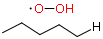

In [26]:
merged_reacts = None
merged_prods = None

if len(rmg_reaction.reactants) == 2:
    merged_reacts = Molecule.merge(rmg_reaction.reactants[0],
                                   rmg_reaction.reactants[1])

if len(rmg_reaction.products) == 2:
    merged_prods = Molecule.merge(rmg_reaction.products[0],
                                   rmg_reaction.products[1])
    
merged_reacts.updateMultiplicity()
merged_reacts

In [27]:
for i, atom in enumerate(merged_reacts.atoms):
    if atom.label == "*1":
        lbl1 = i
    if atom.label == "*2":
        lbl2 = i
    if atom.label == "*3":
        lbl3 = i
labels = [lbl1, lbl2, lbl3]
atomMatch = ((lbl1,), (lbl2,), (lbl3,))
labels

[2, 8, 0]

### Now we actually make the RDKit Geometry

In [28]:
combined = merged_reacts.toRDKitMol(removeHs=False)
Chem.rdDistGeom.EmbedMolecule(combined)
#view_mol(combined)

0

In [29]:
bm = rdkit.Chem.rdDistGeom.GetMoleculeBoundsMatrix(combined)
bm

array([[  0.00000000e+00,   1.32600000e+00,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.93274314e+00,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  1.30600000e+00,   0.00000000e+00,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00025420e+00,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  3.65000000e+00,   3.65000000e+00,   0.00000000e+00,
          1.00000000e+03,   1.52400000e+00,   3.81071948e+00,
          2.51279063e+00,   1.00000000e+03

In [30]:
def set_limits( bm, lbl1, lbl2, value, uncertainty):
    """
    A method to set the limits of a particular distance between two atoms

    :param bm: an array of arrays corresponding to the bounds matrix
    :param lbl1: the label of one atom
    :param lbl2: the label of another atom
    :param value: the distance from a distance data object (float)
    :param uncertainty: the uncertainty of the `value` distance (float)
    :return bm: an array of arrays corresponding to the edited bounds matrix
    """
    if lbl1 > lbl2:
        bm[lbl2][lbl1] = value + uncertainty / 2
        bm[lbl1][lbl2] = max(0, value - uncertainty / 2)
    else:
        bm[lbl2][lbl1] = max(0, value - uncertainty / 2)
        bm[lbl1][lbl2] = value + uncertainty / 2

    return bm

In [31]:
lbl1, lbl2, lbl3 = labels

sect = [] #rename for future
for atom in merged_reacts.split()[1].atoms: sect.append(atom.sortingLabel)

uncertainties = {'d12': 0.02, 'd13': 0.02, 'd23': 0.02}  # distanceData.uncertainties or {'d12':0.1, 'd13':0.1, 'd23':0.1 } # default if uncertainty is None
bm = set_limits(bm, lbl1, lbl2, distance_data.distances['d12'], uncertainties['d12'])
bm = set_limits(bm, lbl2, lbl3, distance_data.distances['d23'], uncertainties['d23'])
bm = set_limits(bm, lbl1, lbl3, distance_data.distances['d13'], uncertainties['d13'])
bm

array([[  0.00000000e+00,   1.32600000e+00,   2.54034300e+00,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.93274314e+00,   1.16707400e+00,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  1.30600000e+00,   0.00000000e+00,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00025420e+00,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03],
       [  2.52034300e+00,   3.65000000e+00,   0.00000000e+00,
          1.00000000e+03,   1.52400000e+00,   3.81071948e+00,
          2.51279063e+00,   1.00000000e+03

In [32]:
others = range(len(bm))
for idx in sect: others.remove(idx)

for i in range(len(bm)):#sect:
    for j in range(i):#others:
        if i<j: continue
        for k in range(len(bm)):
            if k==i or k==j or i==j: continue
            Uik = bm[i,k] if k>i else bm[k,i]
            Ukj = bm[j,k] if k>j else bm[k,j]

            maxLij = Uik + Ukj - 0.1
            if bm[i,j] >  maxLij:
                logging.info("Changing lower limit {0} to {1}".format(bm[i, j], maxLij))
                bm[i,j] = maxLij


<ipython-input-32-0083f93e28d9>:14 <module> INFO Changing lower limit 2.520343 to 2.457475
<ipython-input-32-0083f93e28d9>:14 <module> INFO Changing lower limit 3.65 to 3.26214059416
<ipython-input-32-0083f93e28d9>:14 <module> INFO Changing lower limit 2.9 to 2.393074


In [33]:
rdkit.DistanceGeometry.DoTriangleSmoothing(bm)
# Triangle smoothing is??

True

In [34]:
bm

array([[ 0.        ,  1.326     ,  2.540343  ,  7.11877072,  3.36214059,
         5.87493122,  4.60598009,  1.93274314,  1.167074  ,  3.01903958,
         3.01903958,  8.04488619,  8.04488619,  8.04488619,  4.242455  ,
         4.242455  ,  5.55720719,  5.55720719,  6.80104669,  6.80104669],
       [ 1.306     ,  0.        ,  3.866343  ,  8.44477072,  4.68814059,
         7.20093122,  5.93198009,  1.0002542 ,  2.493074  ,  4.34503958,
         4.34503958,  9.37088619,  9.37088619,  9.37088619,  5.568455  ,
         5.568455  ,  6.88320719,  6.88320719,  8.12704669,  8.12704669],
       [ 2.457475  ,  3.65      ,  0.        ,  5.02558126,  1.524     ,
         3.81071948,  2.51279063,  4.47308614,  1.390401  ,  1.11940079,
         1.11940079,  5.95169672,  5.95169672,  5.95169672,  2.19506659,
         2.19506659,  3.43890609,  3.43890609,  4.70785722,  4.70785722],
       [ 3.65      ,  3.65      ,  2.73      ,  0.        ,  3.81071948,
         1.524     ,  2.51279063,  9.05151386,  

In [35]:
combined.RemoveAllConformers()
for i in range(0, 1000):
    try:
        EmbedLib.EmbedMol(combined, bm, atomMatch=atomMatch)
        break
    except ValueError:
        x = 3
        logging.info("RDKit failed to embed on attempt {0} of {1}".format(i + 1, 1000))
        # What to do next (what if they all fail?) !!!!!
    except RuntimeError:
        logging.info("RDKit failed to embed.")
else:
    logging.error("RDKit failed all attempts to embed")
    
for i in range(len(combined.GetConformers())):
    combined.GetConformers()[i].SetId(i)
    
#view_mol(combined)

In [36]:
energy = 0.0
minEid = 0;
lowestE = 9.999999e99;  # start with a very high number, which would never be reached
crude = Chem.Mol(combined.ToBinary())

for conf in combined.GetConformers():
    if bm is None:
        AllChem.UFFOptimizeMolecule(combined, confId=conf.GetId())
        energy = AllChem.UFFGetMoleculeForceField(combined, confId=conf.GetId()).CalcEnergy()
    else:
        eBefore, energy = EmbedLib.OptimizeMol(combined, bm, atomMatches=atomMatch,
                                               forceConstant=100000.0)

    if energy < lowestE:
        minEid = conf.GetId()
        lowestE = energy
        
#view_mol(combined)

In [37]:
mol_list = AllChem.MolToMolBlock(combined).split('\n')
ase_atoms = []
for i, line in enumerate(mol_list):

    if i > 3:

        try:
            atom0, atom1, bond, rest = line
            atom0 = int(atom0)
            atom0 = int(atom1)
            bond = float(bond)

        except ValueError:
            try:
                x, y, z, symbol = line.split()[0:4]
                x = float(x)
                y = float(y)
                z = float(z)
                # print symbol

                ase_atoms.append(Atom(symbol=symbol, position=(x, y, z)))

            except:
                continue

ase_ts = Atoms(ase_atoms)
view(ase_ts, viewer='x3d')

# Now to show how to use calculators!

In [38]:
from ase.calculators.gaussian import *

calc = Gaussian(mem="5GB", 
                nprocshared="20", 
                label="test", 
                scratch="/gss_gpfs_scratch/harms.n/drug_conformer", 
                method="m062x", 
                basis="6-311+g(2df,2p)",
                extra="opt=(ts,calcfc,noeigentest) freq",
                multiplicity = merged_reacts.multiplicity)
del calc.parameters['force']
calc.parameters

{'basis': '6-311+g(2df,2p)',
 'charge': 0,
 'mem': '5GB',
 'method': 'm062x',
 'multiplicity': 2,
 'nprocshared': '20'}

In [ ]:
calc.write_input(ase_ts)

In [ ]:
calc.calculate(ase_ts)